# DL Project: Intraday Stock Classification using LSTM

##Group Memebers:
1. Sahil Patki I039
2. Hansin Patwa I040
3. Maitri Shah I057


In [ ]:
!pip install talib-binary
import talib as ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 32.1 MB/s 


In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=94d460c377d12ea10c55fda747c27a2f58a5235cb74c5449ce508b7714cb59aa
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
start_date = '2022-10-01'
end_date = '2022-10-07'

# Set the ticker
ticker = 'AAPL'

# Get the data
data = yf.download(ticker, start_date, end_date,interval='1m').reset_index()

[*********************100%***********************]  1 of 1 completed


In [ ]:
start_date = '2022-10-07'
end_date = '2022-10-14'

# Set the ticker
ticker = 'AAPL'

# Get the data
data = data.append(yf.download(ticker, start_date, end_date,interval='1m').reset_index(),ignore_index=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
start_date = '2022-10-15'
end_date = '2022-10-22'

# Set the ticker
ticker = 'AAPL'

# Get the data
data = data.append(yf.download(ticker, start_date, end_date,interval='1m').reset_index(),ignore_index=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03 09:30:00,138.210007,138.649994,137.684998,138.014999,138.014999,4117787
1,2022-10-03 09:31:00,138.059998,138.289993,137.970001,138.160004,138.160004,506705
2,2022-10-03 09:32:00,138.160004,138.240005,138.020004,138.210007,138.210007,409728
3,2022-10-03 09:33:00,138.570007,138.690002,138.509995,138.630005,138.630005,1002021
4,2022-10-03 09:34:00,138.621704,139.100006,138.389999,138.800003,138.800003,994597
...,...,...,...,...,...,...,...
5444,2022-10-21 15:55:00,147.520004,147.520004,147.375000,147.414993,147.414993,427451
5445,2022-10-21 15:56:00,147.419998,147.449997,147.350006,147.414993,147.414993,340241
5446,2022-10-21 15:57:00,147.414993,147.419998,147.339996,147.380005,147.380005,389550
5447,2022-10-21 15:58:00,147.384995,147.389999,147.240005,147.380005,147.380005,528982


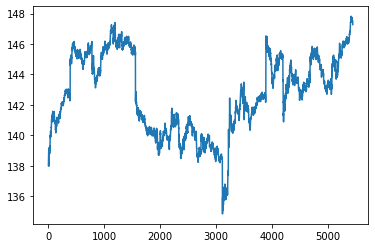

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [ ]:
ret=[]
n=10
for i in range(data.shape[0]):
    reto=[]
    for j in range(1,n+1):
        try:
            reto.append((data["Close"][i]-data["Close"][i-j])/data["Close"][i])
        except:
            reto.append(None)
    ret.append(reto)

In [ ]:
import numpy as np
ret=np.array(ret).reshape(10,data.shape[0])

In [ ]:
for i in range(1,11):
    data["ret"+str(i)]=ret[i-1]

In [ ]:
#Relative Strength Index
data["RSI"]=ta.RSI(data["Close"],timeperiod=14)

In [ ]:
MA5 = ta.SMA(data['Close'], timeperiod=5)
MA13 = ta.SMA(data['Close'], timeperiod=13)
MA30 = ta.SMA(data['Close'], timeperiod=30)

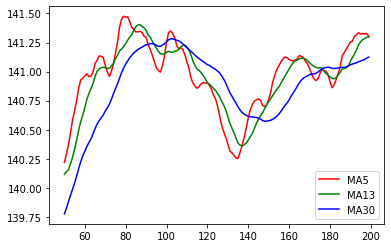

In [ ]:
plt.figure()
plt.plot(MA5[50:200],'r')
plt.plot(MA13[50:200],'g')
plt.plot(MA30[50:200],'b')
plt.legend(['MA5', 'MA13', 'MA30'])

In [ ]:
MA12 = ta.SMA(data['Close'], timeperiod=12)
MA26 = ta.SMA(data['Close'], timeperiod=26)

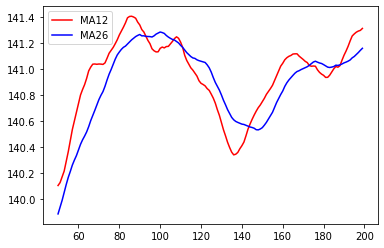

In [ ]:
plt.figure()
plt.plot(MA12[50:200],'r')
plt.plot(MA26[50:200],'b')
plt.legend(['MA12', 'MA26'])

In [ ]:
# Moving Average Convergence Diveresion
#When fast is lower than the slow then we undervalue the stock price
data["MACD"], data["MACD_sig"], macdhist = ta.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
#The standard deviation of the closing price
data["Bupperband"], data["Bmiddleband"], data["Blowerband"] = ta.BBANDS(data["Close"], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

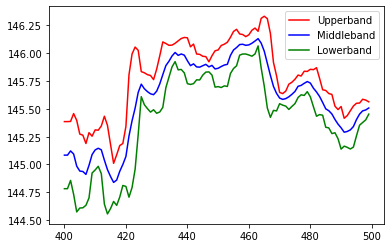

In [ ]:
plt.figure()
plt.plot(data["Bupperband"][400:500],'r')
plt.plot(data["Bmiddleband"][400:500],'b')
plt.plot(data["Blowerband"][400:500],'g')
plt.legend(['Upperband', 'Middleband', 'Lowerband'])

In [ ]:
# Exponential Moving Average
data["EMA"] = ta.EMA(data["Close"], timeperiod=14)

In [ ]:
#Simple Moving Average
data["SMA"] = ta.SMA(data["Close"], timeperiod=14)

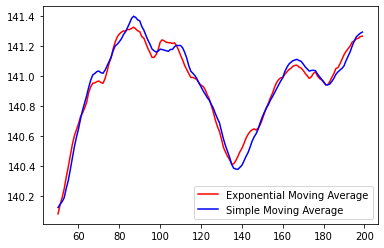

In [ ]:
plt.figure()
plt.plot(data["EMA"][50:200],'r')
plt.plot(data["SMA"][50:200],'b')
plt.legend(['Exponential Moving Average', 'Simple Moving Average'])

In [ ]:
#William R
data["WILLR"] = ta.WILLR(data['High'],data['Low'], data["Close"], timeperiod=14)

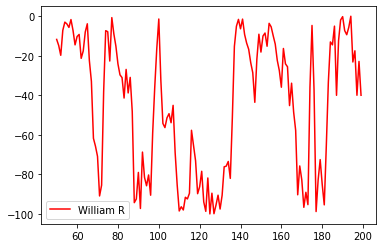

In [ ]:
plt.figure()
plt.plot(data["WILLR"][50:200],'r')
plt.legend(['William R'])

In [ ]:
data.isnull().sum()

Datetime        0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
ret1           55
ret2            0
ret3            0
ret4            0
ret5            0
ret6            0
ret7            0
ret8            0
ret9            0
ret10           0
RSI            14
MACD           33
MACD_sig       33
Bupperband      4
Bmiddleband     4
Blowerband      4
EMA            13
SMA            13
WILLR          13
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data

,Datetime,Open,High,Low,Close,Adj Close,Volume,ret1,ret2,ret3,...,ret10,RSI,MACD,MACD_sig,Bupperband,Bmiddleband,Blowerband,EMA,SMA,WILLR
40,2022-10-03 10:10:00,140.270004,140.274994,139.919998,139.970001,139.970001,365923,0.001225,0.000378,-0.000685,...,0.00007,62.081383,0.376212,0.361334,140.403489,140.149142,139.894796,139.852350,139.837395,-32.302449
41,2022-10-03 10:11:00,139.957993,140.125595,139.904999,140.100098,140.100098,291808,0.004251,-0.000654,0.001165,...,0.000376,64.347192,0.363367,0.361740,140.393802,140.165121,139.936441,139.885383,139.911423,-23.581470
42,2022-10-03 10:12:00,140.101303,140.160004,139.850006,139.931595,139.931595,280158,0.004611,0.000276,0.000103,...,0.001387,59.396583,0.335721,0.356536,140.379515,140.103439,139.827364,139.891545,139.960466,-35.271638
43,2022-10-03 10:13:00,139.940002,140.070007,139.910004,139.955002,139.955002,203846,0.005656,0.000758,0.000034,...,0.00111,59.858586,0.312102,0.347649,140.298713,140.045340,139.791967,139.900006,139.999394,-45.539859
50,2022-10-03 10:20:00,140.289993,140.490005,140.288895,140.414993,140.414993,287568,0.001223,-0.000621,0.000137,...,0.000347,67.854120,0.261784,0.279270,140.462585,140.219000,139.975415,140.082938,140.125514,-11.720669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,2022-10-21 15:55:00,147.520004,147.520004,147.375000,147.414993,147.414993,427451,0.000377,-0.000521,0.001126,...,-0.001765,45.167999,0.008136,0.036374,147.612738,147.498999,147.385260,147.522841,147.530220,-83.752956
5445,2022-10-21 15:56:00,147.419998,147.449997,147.350006,147.414993,147.414993,340241,0.000722,-0.001241,0.003458,...,-0.002071,45.167999,-0.000646,0.028970,147.620525,147.490997,147.361470,147.508461,147.520576,-83.752956
5446,2022-10-21 15:57:00,147.414993,147.419998,147.339996,147.380005,147.380005,389550,0.001127,0.00061,0.003408,...,-0.001256,43.414734,-0.010310,0.021114,147.574083,147.451999,147.329915,147.491334,147.496649,-90.241905
5447,2022-10-21 15:58:00,147.384995,147.389999,147.240005,147.380005,147.380005,528982,0.001954,0.000884,0.003105,...,-0.001562,43.414734,-0.017764,0.013339,147.524879,147.422000,147.319121,147.476490,147.478435,-71.428127


## Methodology

In [ ]:
some=list()
for i in range(1,11):
    some.append(data["ret"+str(i)])
sum=np.sum(some,axis=0)

In [ ]:
#Positive return => 1
#Negative return => 0
y=pd.DataFrame(np.where(sum>0,1,0))

In [ ]:
data

,Datetime,Open,High,Low,Close,Adj Close,Volume,ret1,ret2,ret3,...,ret10,RSI,MACD,MACD_sig,Bupperband,Bmiddleband,Blowerband,EMA,SMA,WILLR
40,2022-10-03 10:10:00,140.270004,140.274994,139.919998,139.970001,139.970001,365923,0.001225,0.000378,-0.000685,...,0.00007,62.081383,0.376212,0.361334,140.403489,140.149142,139.894796,139.852350,139.837395,-32.302449
41,2022-10-03 10:11:00,139.957993,140.125595,139.904999,140.100098,140.100098,291808,0.004251,-0.000654,0.001165,...,0.000376,64.347192,0.363367,0.361740,140.393802,140.165121,139.936441,139.885383,139.911423,-23.581470
42,2022-10-03 10:12:00,140.101303,140.160004,139.850006,139.931595,139.931595,280158,0.004611,0.000276,0.000103,...,0.001387,59.396583,0.335721,0.356536,140.379515,140.103439,139.827364,139.891545,139.960466,-35.271638
43,2022-10-03 10:13:00,139.940002,140.070007,139.910004,139.955002,139.955002,203846,0.005656,0.000758,0.000034,...,0.00111,59.858586,0.312102,0.347649,140.298713,140.045340,139.791967,139.900006,139.999394,-45.539859
50,2022-10-03 10:20:00,140.289993,140.490005,140.288895,140.414993,140.414993,287568,0.001223,-0.000621,0.000137,...,0.000347,67.854120,0.261784,0.279270,140.462585,140.219000,139.975415,140.082938,140.125514,-11.720669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,2022-10-21 15:55:00,147.520004,147.520004,147.375000,147.414993,147.414993,427451,0.000377,-0.000521,0.001126,...,-0.001765,45.167999,0.008136,0.036374,147.612738,147.498999,147.385260,147.522841,147.530220,-83.752956
5445,2022-10-21 15:56:00,147.419998,147.449997,147.350006,147.414993,147.414993,340241,0.000722,-0.001241,0.003458,...,-0.002071,45.167999,-0.000646,0.028970,147.620525,147.490997,147.361470,147.508461,147.520576,-83.752956
5446,2022-10-21 15:57:00,147.414993,147.419998,147.339996,147.380005,147.380005,389550,0.001127,0.00061,0.003408,...,-0.001256,43.414734,-0.010310,0.021114,147.574083,147.451999,147.329915,147.491334,147.496649,-90.241905
5447,2022-10-21 15:58:00,147.384995,147.389999,147.240005,147.380005,147.380005,528982,0.001954,0.000884,0.003105,...,-0.001562,43.414734,-0.017764,0.013339,147.524879,147.422000,147.319121,147.476490,147.478435,-71.428127


In [ ]:
data=data.iloc[:,1:]

In [ ]:
data1=data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [ ]:
data=np.array(data)
window=30
X=[]
for i in range(window,data.shape[0]):
    # X.append(tf.convert_to_tensor(data[i-window:i,4:]))
    X.append(data[i-window:i,:])
X=np.array(X)

In [ ]:
X = np.asarray(X).astype(np.float32)

In [ ]:
y = np.asarray(y).astype(np.float32)

## Model

In [ ]:
from sklearn.model_selection import train_test_split

X_processing, X_test, y_processing, y_test  = train_test_split(X,
                                                               y[window:],
                                                               shuffle=False,
                                                               test_size=0.1)
X_train, X_valid, y_train, y_valid          = train_test_split(X_processing,
                                                               y_processing,
                                                               shuffle=False,
                                                               test_size=0.2)
print(X_train.shape, X_valid.shape, X_test.shape, y_test.shape)

(3857, 30, 25) (965, 30, 25) (536, 30, 25) (536, 1)


In [ ]:
X_train[0].shape

(30, 25)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

tf.keras.backend.clear_session()


model = Sequential([
                    LSTM(units=500, batch_input_shape=(None, window,25),return_sequences=True),
                    LSTM(units=500),
                    Dense(500),
                    Dense(1,activation="sigmoid")
                    ])
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=["binary_crossentropy"]) #tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.summary()
history = model.fit(x=X_train,y=y_train, epochs=50, validation_data=(X_valid,y_valid))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 500)           1052000   
                                                                 
 lstm_1 (LSTM)               (None, 500)               2002000   
                                                                 
 dense (Dense)               (None, 500)               250500    
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 3,305,001
Trainable params: 3,305,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
121/121 [==============================] - 11s 25ms/step - loss: 0.6675 - binary_crossentropy: 0.6675 - val_loss: 0.6732 - val_binary_crossentropy: 0.6732
Epoch 2/50
1

## Results

121/121 [==============================] - 2s 5ms/step


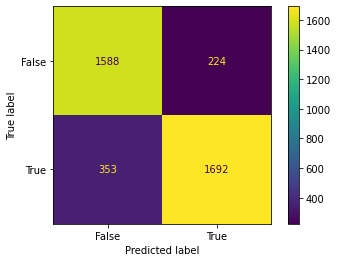

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ypred=model.predict(X_train)
ypred=np.where(ypred>0.5 ,1,0)
confusion_matrix=confusion_matrix(y_train,ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

17/17 [==============================] - 0s 4ms/step


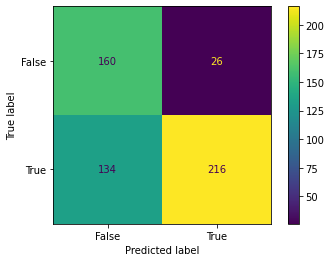

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ypred=model.predict(X_test)
ypred=np.where(ypred>0.5 ,1,0)
confusion_matrix=confusion_matrix(y_test,ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Simulations

In [ ]:
data1=data1.reset_index()

In [ ]:
strat=[]
some=list()
for i in range(3,11):
    some.append(data1["ret"+str(i)])
sum=np.sum(some,axis=0)
strat=(np.where(sum>0,1,0))

In [ ]:
budget=50000
plot=[]
plot.append(budget)
for i in range(X_train.shape[0]):
    if strat[i]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot.append(budget)

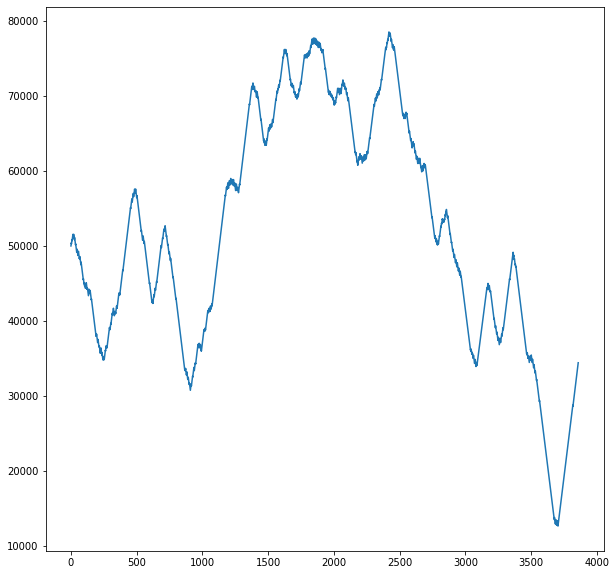

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(plot)

121/121 [==============================] - 1s 8ms/step


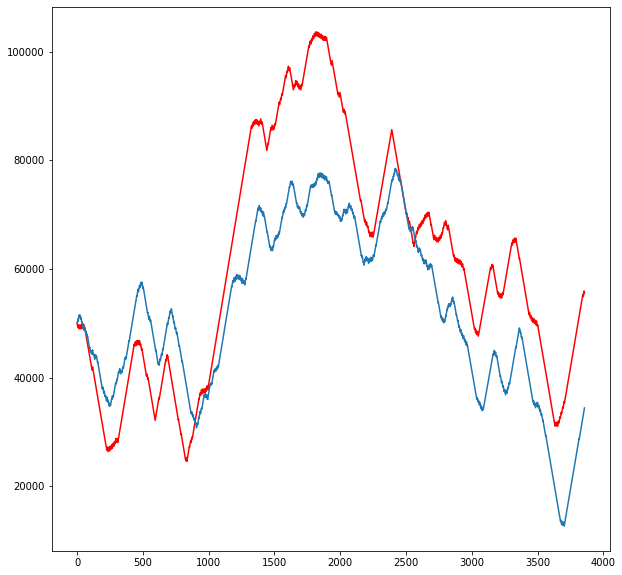

In [ ]:
ypred=model.predict(X_train)
ypred=np.where(ypred>0.5 ,1,0)
budget=50000
plot=[]
plot.append(budget)
for i in range(X_train.shape[0]):
    if strat[i]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot.append(budget)
budget=50000
plot1=[]
plot1.append(budget)
for i in range(X_train.shape[0]):
    if ypred[i]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot1.append(budget)
plt.figure(figsize=(10,10))
plt.plot(plot1,'red')
plt.plot(plot)

31/31 [==============================] - 0s 7ms/step


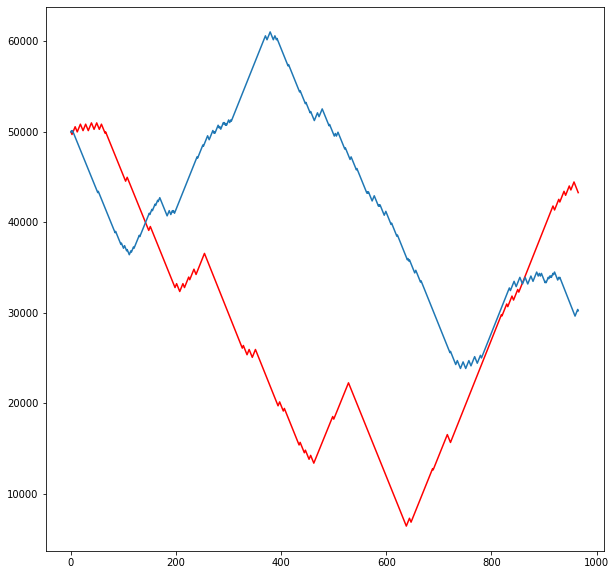

In [ ]:
ypred=model.predict(X_valid)
ypred=np.where(ypred>0.5 ,1,0)
budget=50000
plot=[]
plot.append(budget)
for i in range(data1.shape[0]-X_valid.shape[0],data1.shape[0]):
    if strat[i]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot.append(budget)
budget=50000
plot1=[]
plot1.append(budget)
for i in range(data1.shape[0]-X_valid.shape[0],data1.shape[0]):
    if ypred[i-data1.shape[0]+X_valid.shape[0]]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot1.append(budget)
plt.figure(figsize=(10,10))
plt.plot(plot1,'red')
plt.plot(plot)

17/17 [==============================] - 0s 7ms/step


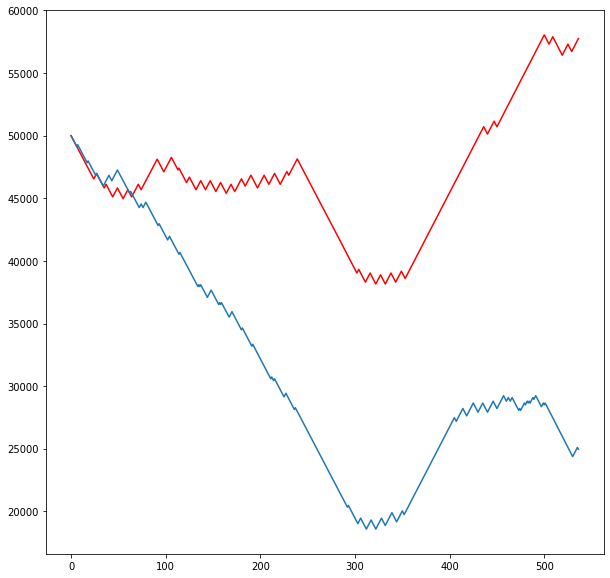

In [ ]:
ypred=model.predict(X_test)
ypred=np.where(ypred>0.5 ,1,0)
budget=50000
plot=[]
plot.append(budget)
for i in range(data1.shape[0]-X_test.shape[0],data1.shape[0]):
    if strat[i]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot.append(budget)
budget=50000
plot1=[]
plot1.append(budget)
for i in range(data1.shape[0]-X_test.shape[0],data1.shape[0]):
    if ypred[i-data1.shape[0]+X_test.shape[0]]==1:
        budget-=data1["Close"][i]
    else:
        budget+=data1["Close"][i]
    plot1.append(budget)
plt.figure(figsize=(10,10))
plt.plot(plot1,'red')
plt.plot(plot)

## Conclusions
The market is very voltile while some may say it is random it in real essense is not really so. Here we switched from using the standard regression model to a classification model. The advantage of using such a method is that this allows you a lot of freedom in pointing the model towards a specific direction. In other words when we generate the signal we draw the models attention to specific details. We can say that the performance of this model is very much dependent on the method we use to generate the signal. The method we used to generate the signal was very elementry but the results were not that bad. As we can see on simulation on the training data keeping the budget as 50000 we are able to make a aproximate profit of 10000 dollars in the span of aproximatly 16 days. The valdiation data does see general loss our predictions still do better. On the testing data while we do see a loss in our strategy our predictions do much better and end up getting a profit.
